<a href="https://colab.research.google.com/github/aman685892/Superstore-EDA-Python/blob/main/Superstore_Sales_%26_Profit_Analysis_using_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Shape: (2739, 21)
    Row ID        Order ID Order Date  Ship Date       Ship Mode Customer ID  \
0        1  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
1        2  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
13      14  CA-2016-161389 2016-12-05 2016-12-10  Standard Class    IM-15070   
35      36  CA-2016-117590 2016-12-08 2016-12-10     First Class    GH-14485   
36      37  CA-2016-117590 2016-12-08 2016-12-10     First Class    GH-14485   

   Customer Name    Segment        Country        City  ... Postal Code  \
0    Claire Gute   Consumer  United States   Henderson  ...       42420   
1    Claire Gute   Consumer  United States   Henderson  ...       42420   
13  Irene Maddox   Consumer  United States     Seattle  ...       98103   
35     Gene Hale  Corporate  United States  Richardson  ...       75080   
36     Gene Hale  Corporate  United States  Richardson  ...       75080   

     Region       Product ID         Category

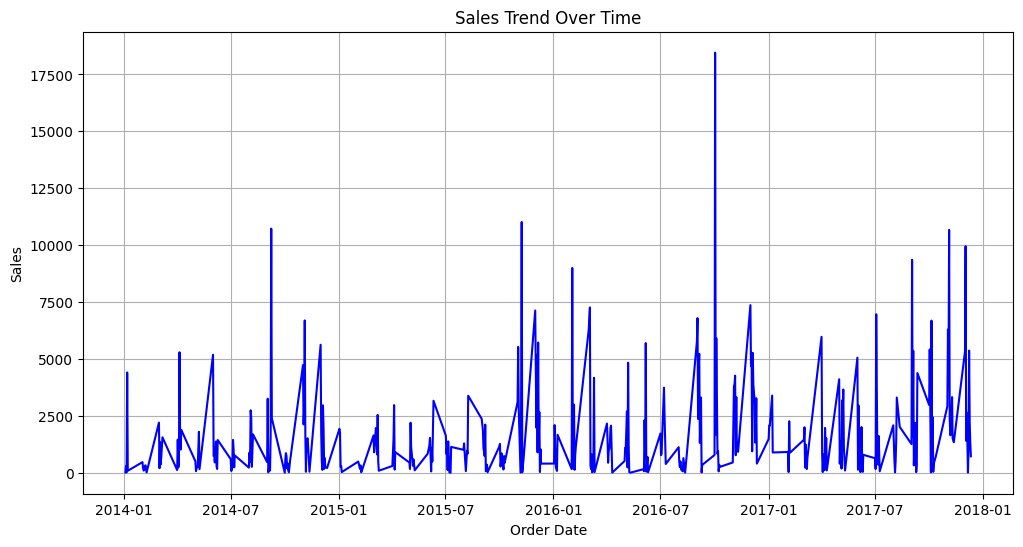

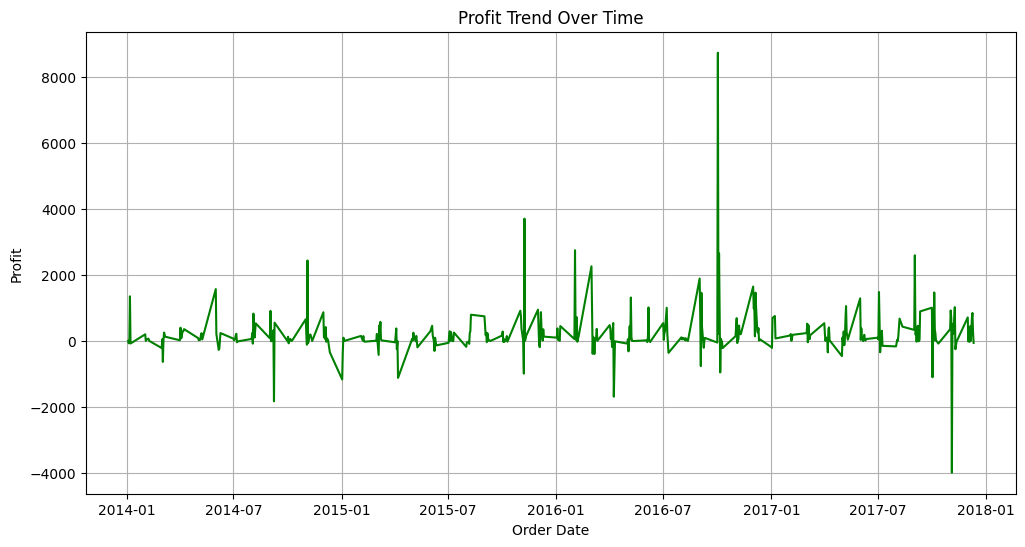

/tmp/ipython-input-717609823.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_sales.index, y=region_sales.values, palette='viridis')


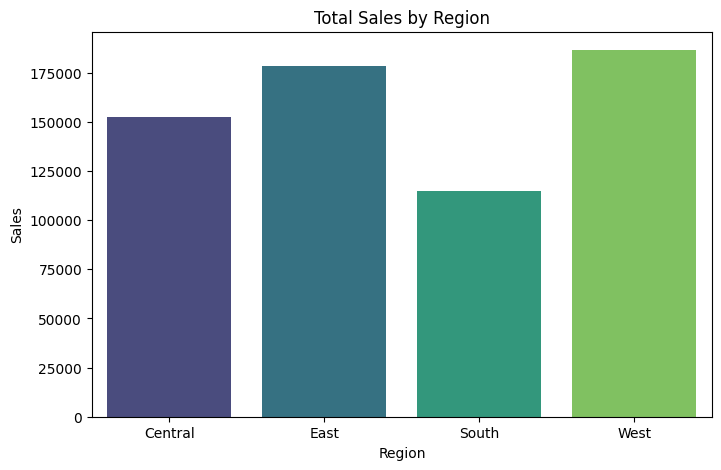

/tmp/ipython-input-717609823.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ship_mode_sales.index, y=ship_mode_sales.values, palette='magma')


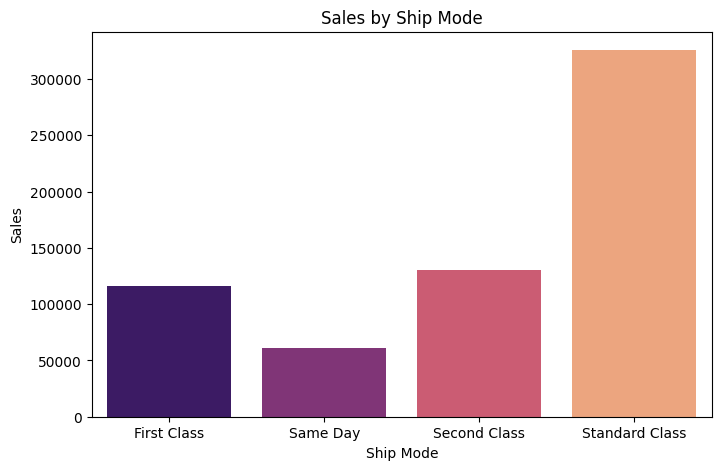

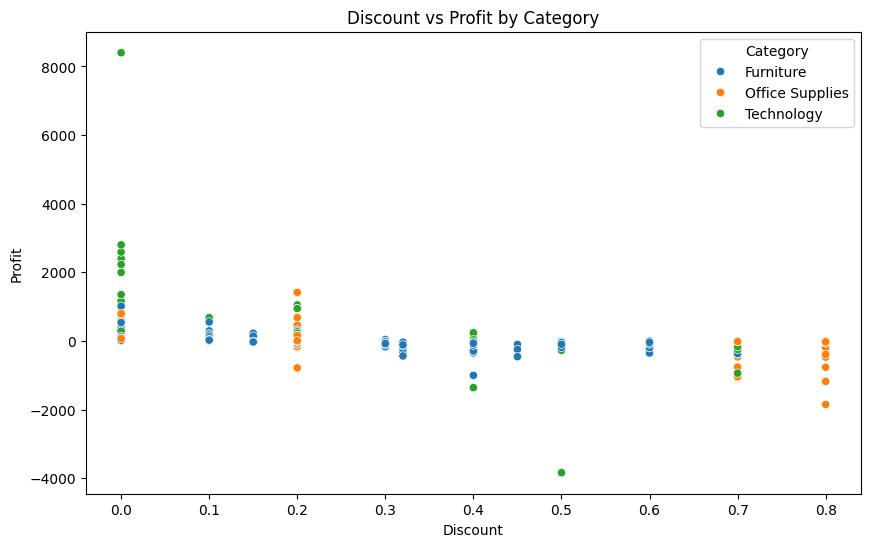

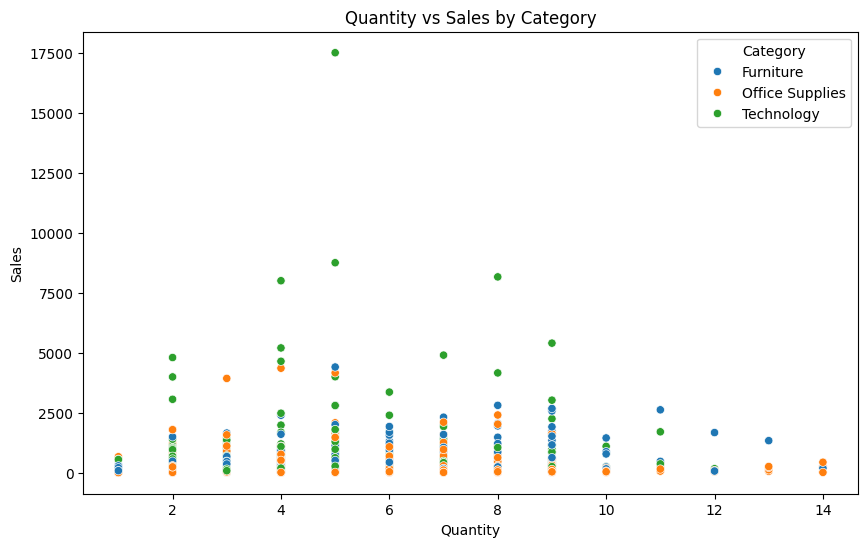

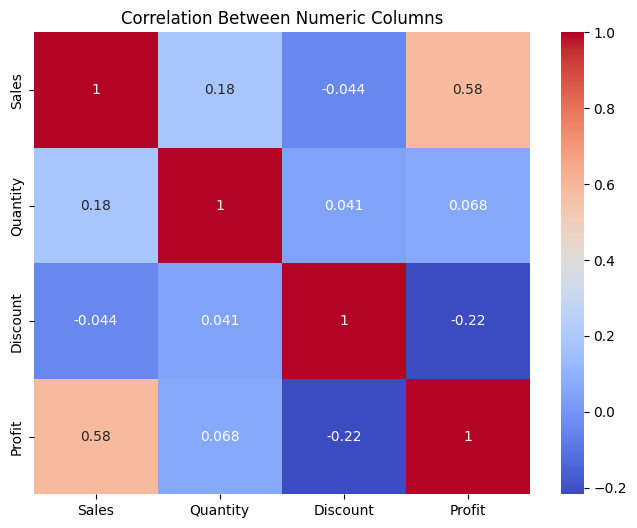

In [ ]:
# Step 1: Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load data
df = pd.read_csv("/content/12.csv", encoding='latin-1')

# Step 3: Convert dates and drop invalid
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], errors='coerce')
df = df.dropna(subset=['Order Date', 'Ship Date'])

# Step 4: Quick info
print("Data Shape:", df.shape)
print(df.head())

# Step 5: Total Sales, Profit and Quantity by Category
category_summary = df.groupby('Category')[['Sales','Profit','Quantity']].sum().sort_values('Sales', ascending=False)
print("\nCategory Summary:\n", category_summary)

# Step 6: Top 10 Products by Sales
top_products = df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(10)
print("\nTop 10 Products by Sales:\n", top_products)

# Step 7: Sales Trend over Time
sales_time = df.groupby('Order Date')['Sales'].sum()
plt.figure(figsize=(12,6))
plt.plot(sales_time.index, sales_time.values, color='blue')
plt.title("Sales Trend Over Time")
plt.xlabel("Order Date")
plt.ylabel("Sales")
plt.grid(True)
plt.show()

# Step 8: Profit Trend over Time
profit_time = df.groupby('Order Date')['Profit'].sum()
plt.figure(figsize=(12,6))
plt.plot(profit_time.index, profit_time.values, color='green')
plt.title("Profit Trend Over Time")
plt.xlabel("Order Date")
plt.ylabel("Profit")
plt.grid(True)
plt.show()

# Step 9: Sales by Region
region_sales = df.groupby('Region')['Sales'].sum()
plt.figure(figsize=(8,5))
sns.barplot(x=region_sales.index, y=region_sales.values, palette='viridis')
plt.title("Total Sales by Region")
plt.ylabel("Sales")
plt.show()

# Step 10: Ship Mode Analysis
ship_mode_sales = df.groupby('Ship Mode')['Sales'].sum()
plt.figure(figsize=(8,5))
sns.barplot(x=ship_mode_sales.index, y=ship_mode_sales.values, palette='magma')
plt.title("Sales by Ship Mode")
plt.ylabel("Sales")
plt.show()

# Step 11: Discount vs Profit
plt.figure(figsize=(10,6))
sns.scatterplot(x='Discount', y='Profit', data=df, hue='Category')
plt.title("Discount vs Profit by Category")
plt.xlabel("Discount")
plt.ylabel("Profit")
plt.show()

# Step 12: Quantity vs Sales
plt.figure(figsize=(10,6))
sns.scatterplot(x='Quantity', y='Sales', data=df, hue='Category')
plt.title("Quantity vs Sales by Category")
plt.xlabel("Quantity")
plt.ylabel("Sales")
plt.show()

# Step 13: Correlation Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df[['Sales','Quantity','Discount','Profit']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Between Numeric Columns")
plt.show()


In [ ]:
# Save the cleaned dataset for Excel & Power BI
df.to_csv("cleaned_superstore.csv", index=False)


In [ ]:
df.to_csv("cleaned_superstore.csv", index=False)


In [ ]:
from google.colab import files
files.download("cleaned_superstore.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>